In [64]:
from pathlib import Path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import StandardScaler
import scipy.stats as stats


from glob import glob

DATASET_DIR = Path('data/HYPERVIEW2')

GT_TRAIN_CSV_PATH = DATASET_DIR / 'train_gt.csv'
gt_train_df = pd.read_csv(GT_TRAIN_CSV_PATH)
ydf = gt_train_df.drop(['sample_index'], axis=1)
column_names = ['Fe', 'Zn', 'B', 'Cu', 'S', 'Mn']

<Axes: >

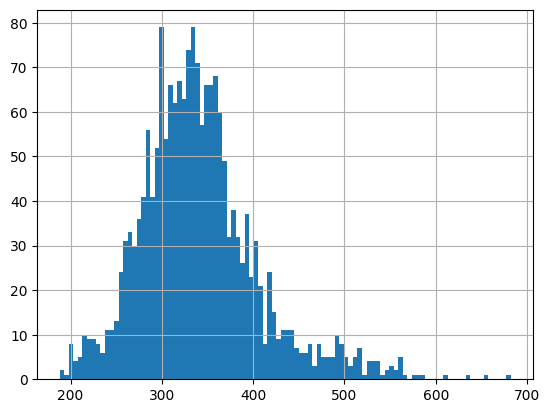

In [65]:
ydf.sum(axis=1).hist(bins=100)

In [67]:
pd.concat([ydf, ydf.sum(axis=1).rename('sum')], axis=1).corr().style.background_gradient()

,B,Cu,Zn,Fe,S,Mn,sum
B,1.000000,0.191813,0.322162,-0.229876,-0.150916,0.139189,-0.177742
Cu,0.191813,1.000000,0.418141,0.326628,0.189779,0.160842,0.409190
Zn,0.322162,0.418141,1.000000,0.359367,-0.156334,-0.069676,0.308155
Fe,-0.229876,0.326628,0.359367,1.000000,0.058912,-0.088533,0.904978
S,-0.150916,0.189779,-0.156334,0.058912,1.000000,0.237886,0.326900
Mn,0.139189,0.160842,-0.069676,-0.088533,0.237886,1.000000,0.299282
sum,-0.177742,0.409190,0.308155,0.904978,0.326900,0.299282,1.000000


In [30]:
pd.concat([ydf, ydf.sum(axis=1).rename('sum')], axis=1).corr(method='spearman').style.background_gradient()

,B,Cu,Zn,Fe,S,Mn,sum
B,1.000000,0.188079,0.376321,-0.298234,-0.119507,0.118571,-0.234112
Cu,0.188079,1.000000,0.347612,0.317025,0.263794,0.195587,0.426367
Zn,0.376321,0.347612,1.000000,0.305423,-0.207303,-0.054999,0.271185
Fe,-0.298234,0.317025,0.305423,1.000000,0.103241,-0.036238,0.877700
S,-0.119507,0.263794,-0.207303,0.103241,1.000000,0.300326,0.356223
Mn,0.118571,0.195587,-0.054999,-0.036238,0.300326,1.000000,0.338327
sum,-0.234112,0.426367,0.271185,0.877700,0.356223,0.338327,1.000000


<Axes: xlabel='value', ylabel='Count'>

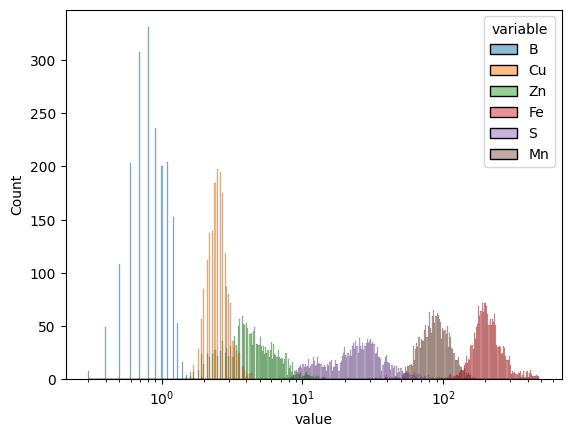

In [4]:
sns.histplot(data=ydf.melt(), hue='variable', x='value', log_scale=True, bins=400)

<Axes: xlabel='value', ylabel='Count'>

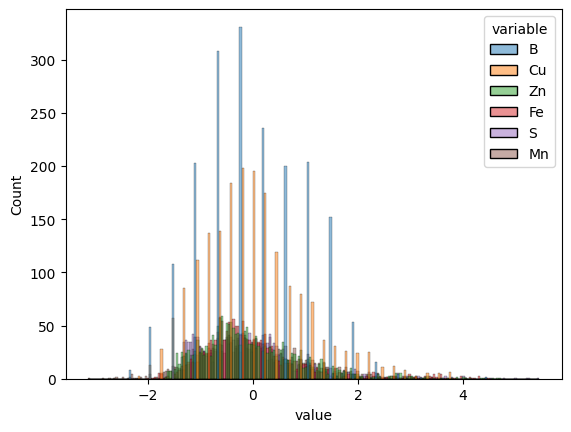

In [5]:
scaler = StandardScaler()
ydf_scaled = scaler.fit_transform(ydf)
ydf_scaled = pd.DataFrame(ydf_scaled, index=ydf.index, columns=ydf.columns)
sns.histplot(data=ydf_scaled.melt(), hue='variable', x='value', log_scale=False, bins=200)

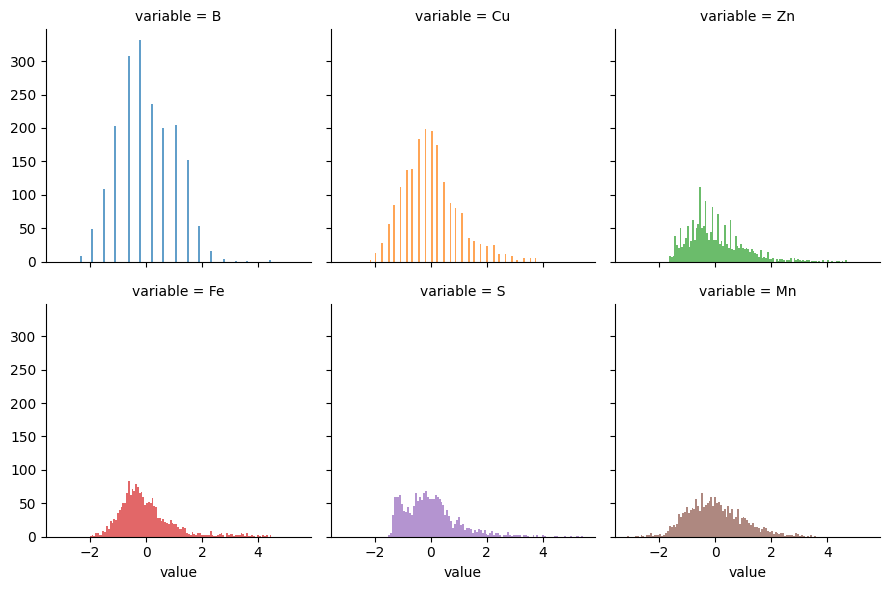

In [52]:
g = sns.FacetGrid(ydf_scaled.melt(), hue='variable', col="variable", col_wrap=3, sharex=True, sharey=True)
g.map(plt.hist, "value", alpha=.7, bins=100)

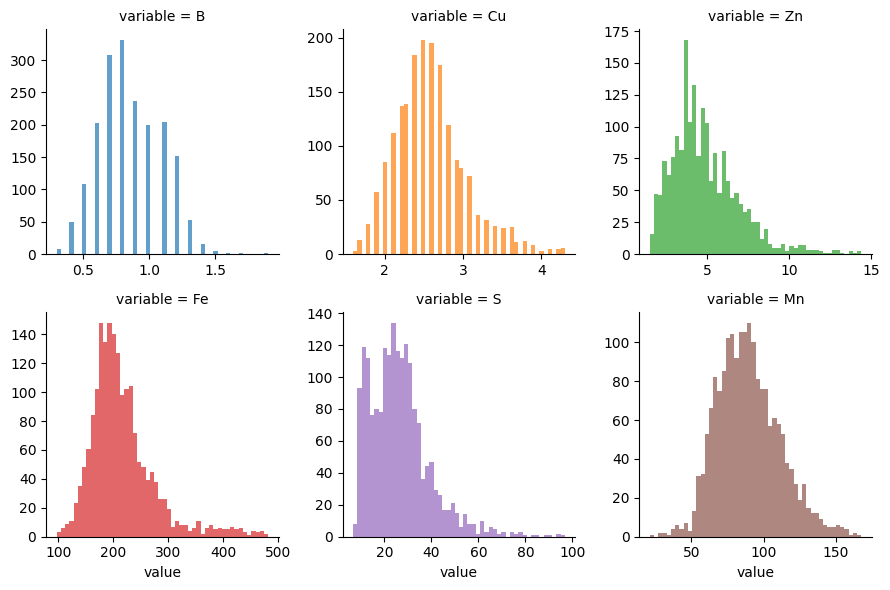

In [81]:
g = sns.FacetGrid(
    ydf.melt(), 
    hue='variable', col="variable",
    col_wrap=3, sharex=False, sharey=False,
    )
g.map(plt.hist, "value", alpha=.7, bins=50)

In [82]:
print(ydf.head().to_markdown())

|    |   B |   Cu |   Zn |    Fe |       S |    Mn |
|---:|----:|-----:|-----:|------:|--------:|------:|
|  0 | 0.8 |  2.1 |  5   | 186.6 | 12.0786 | 110.7 |
|  1 | 0.6 |  3.5 |  7.3 | 255.6 | 12.1997 |  75.7 |
|  2 | 0.5 |  2.1 |  2.3 | 204   | 65.882  |  87.1 |
|  3 | 0.8 |  1.9 |  3.3 | 165.6 | 31.9427 |  56   |
|  4 | 0.5 |  2.4 |  5.8 | 419.9 | 35.9707 |  65.1 |


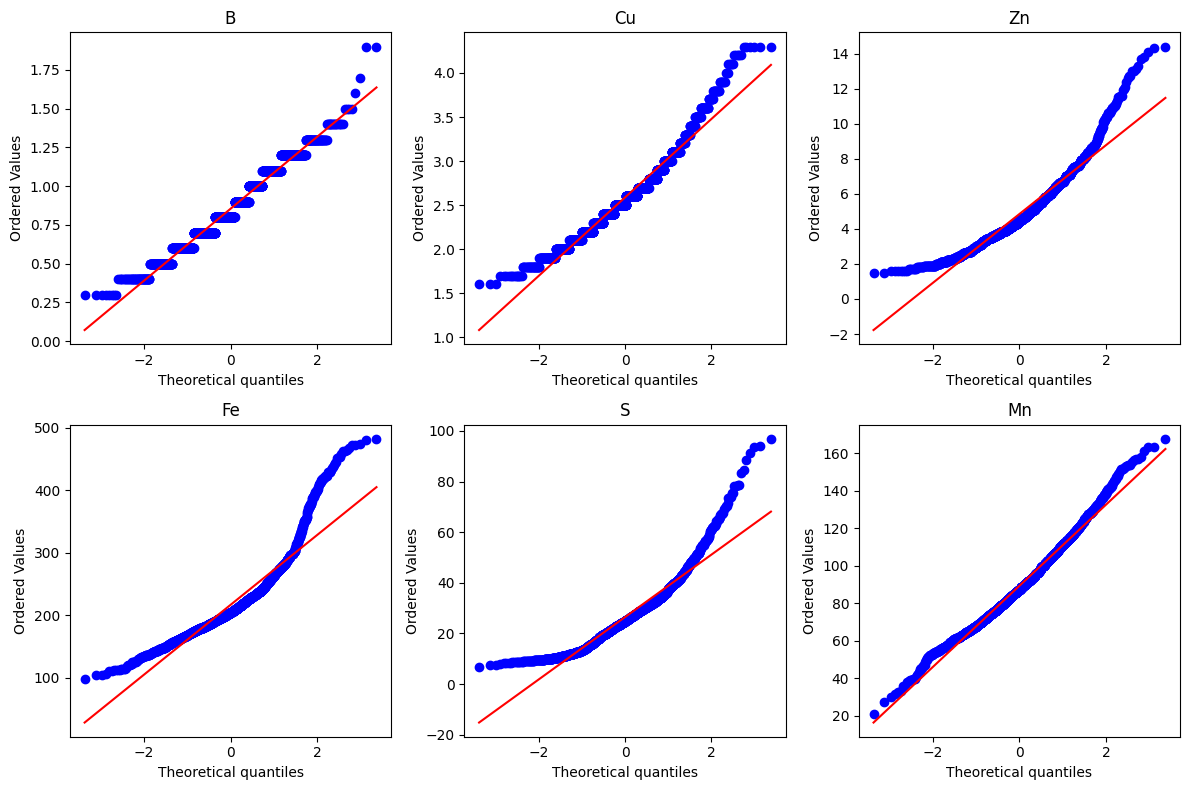

In [26]:
elements = ydf.columns

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for ax, el in zip(axes, elements):
    stats.probplot(ydf[el].dropna(), dist="norm", plot=ax)
    ax.set_title(el)

plt.tight_layout()
plt.show()


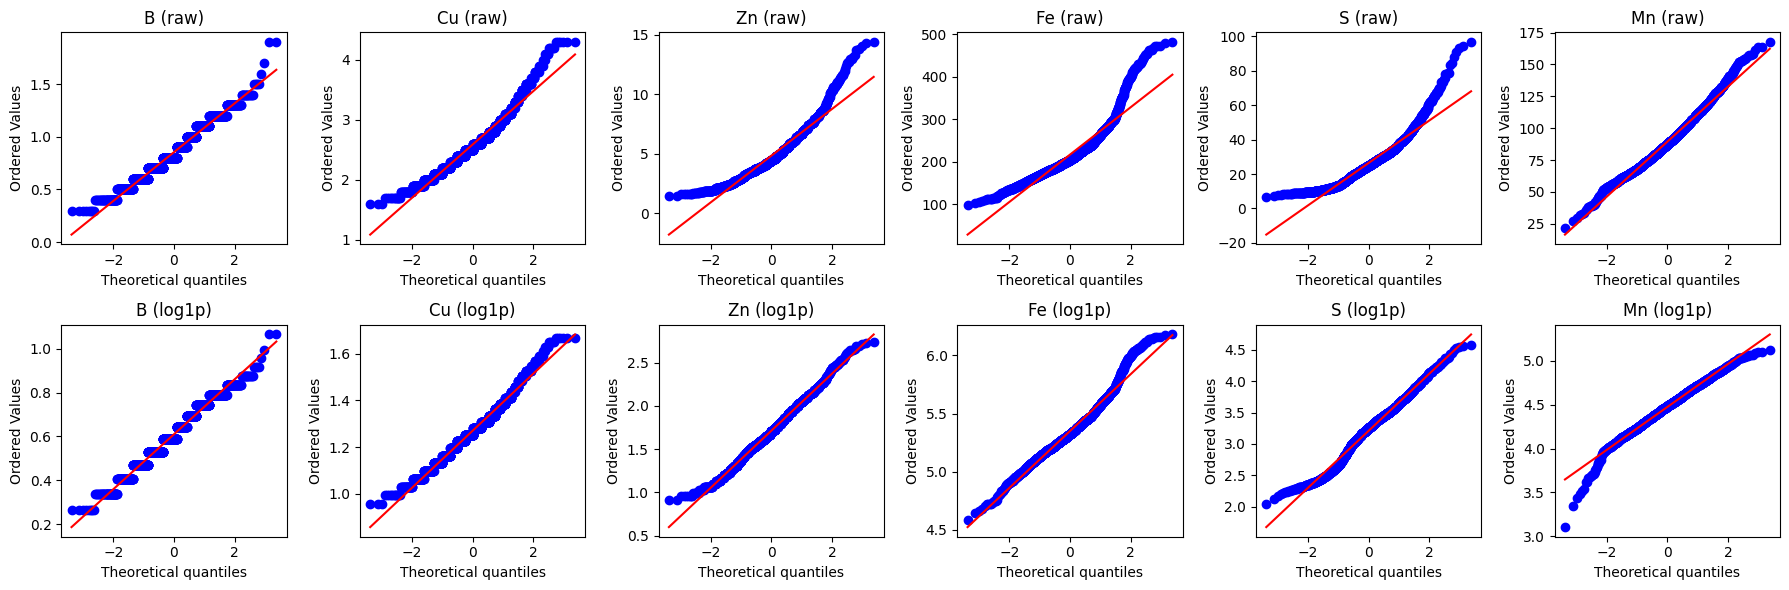

In [27]:
elements = ydf.columns

fig, axes = plt.subplots(2, len(elements), figsize=(3*len(elements), 6))

for i, el in enumerate(elements):
    # oryginalne dane
    stats.probplot(ydf[el].dropna(), dist="norm", plot=axes[0, i])
    axes[0, i].set_title(f"{el} (raw)")

    # log1p
    stats.probplot(np.log1p(ydf[el].dropna()), dist="norm", plot=axes[1, i])
    axes[1, i].set_title(f"{el} (log1p)")

plt.tight_layout()
plt.show()

In [50]:
from sklearn.decomposition import PCA
from umap import UMAP

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


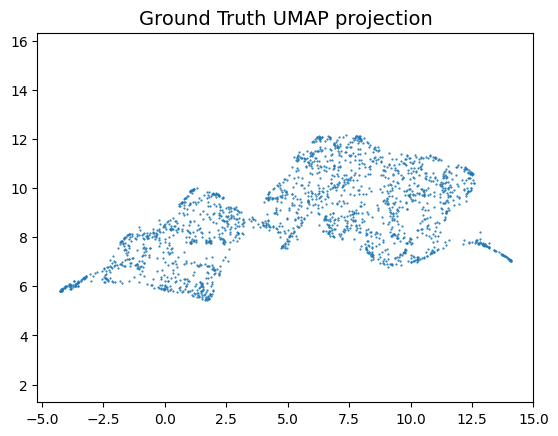

In [61]:
map = UMAP()
map.fit(ydf)

plt.scatter(
    map.embedding_[:, 0],
    map.embedding_[:, 1],
    s=.3
    # c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Ground Truth UMAP projection', fontsize=14);

# Conclusions

0. Standarization required.
1. sums S + B + Cu + Fe + Mn + Zn are not equal across observations. Sums are normally distributed. 
2. Two models? 1. for value of S + B + Cu + Fe + Mn + Zn, and 2. for distributions [S, B, Cu, Fe, Mn, Zn ] ?
3. S and Mn seem to be skewed. log - transformation? Custom loss?